In [498]:
%load_ext autoreload
%config Completer.use_jedi = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [499]:
%autoreload 2
import FEMOL
import numpy as np
np.set_printoptions(linewidth=200)
np.set_printoptions(suppress=True)
from IPython.display import clear_output
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, griddata, interp2d, RectBivariateSpline
import time
import runpy
import os
import sys
import pygmsh

# Development Notebook for the FEMOL Project

In [362]:
def highest_key(msh):
    for i in range(1, 100):
        if f'm{i}_Uz' in msh.point_data.keys():
            pass
        else:
            return f'm{i-1}_Uz'
        
def TOM_improvement(mesh_files, eigvals_files):
    fig, axs = plt.subplots(9, 3, figsize=(6, 18))
    
    for i, msh_f in enumerate(mesh_files):
        msh = FEMOL.mesh.load_vtk(msh_f)
        msh_f_name = msh_f.split('/')[-1]
        eigs = np.load(eigvals_files[i])
        plt.sca(axs[i][0])
        msh.plot.point_data('m1_Uz')
        mode = msh_f_name[11:14]
        layup = '[' + '/'.join((msh_f_name[15:-4].split('_'))) + ']'
        axs[i][0].set_title(f'eigfreq: {int(np.round(eigs[0]))} Hz')
        plt.sca(axs[i][1])
        msh.cell_to_point_data('X')
        msh.plot.point_data('X', cmap='Greys')
        FEMOL.utils.guitar_outline2(L=1)
        axs[i][1].set_title(f'{mode}, {layup}')
        plt.sca(axs[i][2])
        key = highest_key(msh)
        msh.plot.point_data(key)
        axs[i][2].set_title(f'eigfreq:{int(np.round(eigs[-1]))} Hz' )
    
    

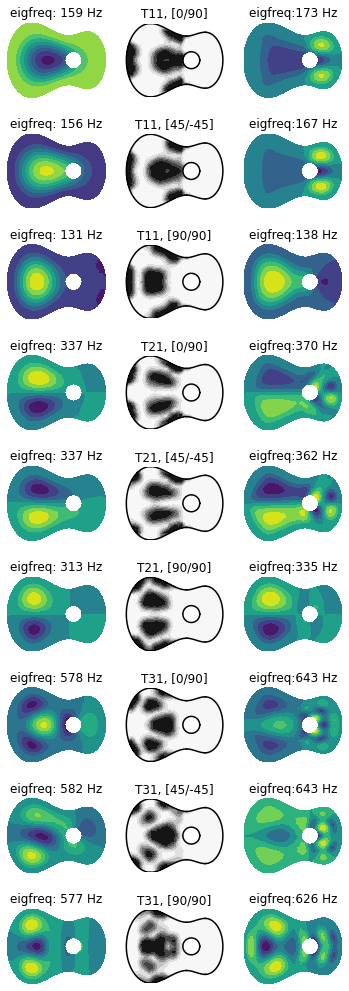

In [363]:
msh_root = 'Results/Soundboard_Article/Soundboard_TOM/iteration_4/meshes/' 
eig_root = 'Results/Soundboard_Article/Soundboard_TOM/iteration_4/eigvals/' 
eig_files = np.sort([eig_root + f for f in os.listdir(eig_root) if f[:3] == 'eig'])
msh_files = np.sort([msh_root + f for f in os.listdir(msh_root) if f[:3] == 'TOM'])

TOM_improvement(msh_files, eig_files)
plt.gcf().savefig('all_TOM', dpi=600)

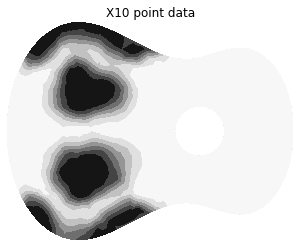

In [486]:
mesh = FEMOL.mesh.load_vtk('Results/Soundboard_Article/Soundboard_TOM/iteration_2/meshes/TOM_lcar03_T21.vtk')
mesh.cell_to_point_data('X10')
mesh.plot.point_data('X10', cmap='Greys')

In [490]:
6666 - (1000*2 + 777.84*5)

776.7999999999993

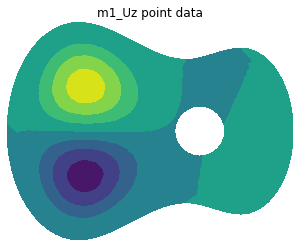

In [487]:
mesh.plot.point_data('m1_Uz')

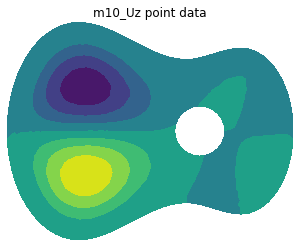

In [488]:
key = highest_key(mesh)
mesh.plot.point_data('m10_Uz')

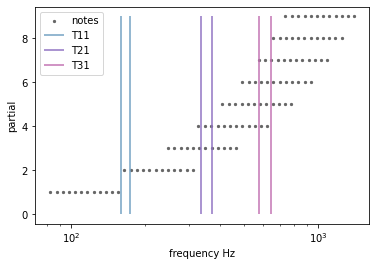

In [389]:
first_notes = np.array([82.0, 87.3, 92.5, 98, 103.8, 110.0, 116.54, 123.47, 130.8, 138.6, 147.0, 155.56])
partials = np.arange(1, 10)

for i, p in enumerate(partials):
    if i ==0:
        plt.scatter(p*first_notes, p*np.ones(first_notes.shape[0]), 5, color='0.4', label='notes')
    else:
        plt.scatter(p*first_notes, p*np.ones(first_notes.shape[0]), 5, color='0.4')

ax = plt.gca()
ax.set_ylabel('partial')
ax.set_xlabel('frequency Hz')
ax.set_xscale('log')

for eig_f, c, l in zip(eig_files[::3], ['#72A1C3', '#9072C3', '#C372B3'], ['T11', 'T21', 'T31']):
    eigs = np.load(eig_f)
    plt.vlines([eigs[0], eigs[-1]], 0, partials[-1], color=[c, c], label=l)
plt.legend()

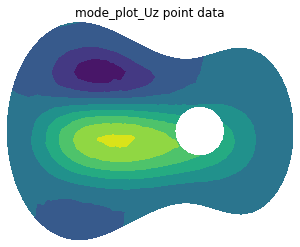

In [463]:
mesh = FEMOL.mesh.guitar(L=1, lcar=0.04)
mode1 = -np.load('Results/guitar_modes/guitar_mode_T11_lcar04.npy')
mode2 = np.load('Results/guitar_modes/guitar_mode_T21_lcar04.npy')
mode3 = np.load('Results/guitar_modes/guitar_mode_T31_lcar04.npy')
modeT = 0.4*mode1 + 0.4*mode2 + 0.4*mode3
mesh.plot.mode(modeT)

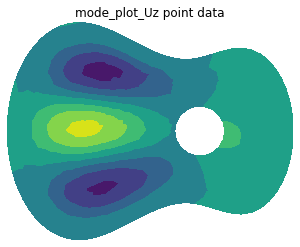

In [466]:
mesh.plot.mode(mode3)

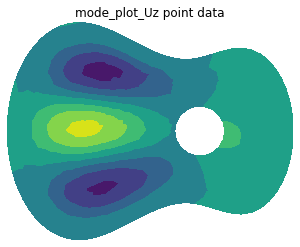

In [454]:
mesh.plot.mode(mode3)

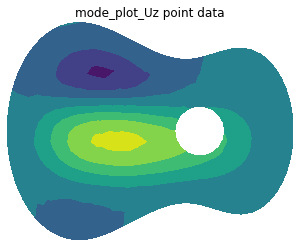

In [455]:
mesh.plot.mode(modeT)

In [507]:
prob = FEMOL.problems.GuitarSimpVibe(mode='T11', mesh_lcar=0.05, volfrac=0.27, p=1)
prob.solve(mesh_filename='TOM_guit_test', 
           eigvals_filename='eigs_guit_test', 
           eigvecs_filename='vecs_guit_test', 
           converge=0.05, max_iter=10,
           save=True)

solving SIMP problem for mode T11 2022-03-31_13_43_26
Solving using scipy.linalg.eigh(K, M)
solved in 2.854745864868164 s
Best mac match (fast solver) : 0.9244102160448486
Iteration : 1, Variation : 0.27737529221420865, EigenVal : 160.71908001033597
Best mac match (fast solver) : 0.22040960716588273
Iteration : 2, Variation : 0.30000000000000004, EigenVal : 163.0338850022923
Best mac match (fast solver) : 0.20349323455524146
Iteration : 3, Variation : 0.24566982828293682, EigenVal : 168.60499288234072
Best mac match (fast solver) : 0.20825592571435625
Iteration : 4, Variation : 0.1968893287471255, EigenVal : 170.5667571007929
Best mac match (fast solver) : 0.22072377697599393
Iteration : 5, Variation : 0.13042437452007838, EigenVal : 170.8287518259197
Best mac match (fast solver) : 0.23241202397552682
Iteration : 6, Variation : 0.08966997955474887, EigenVal : 170.84446575598494
Best mac match (fast solver) : 0.24449386517378932
Iteration : 7, Variation : 0.07098914578430648, EigenVal :

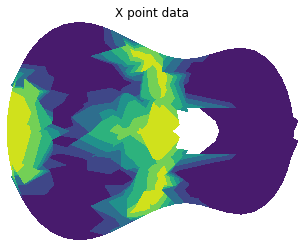

In [525]:
from matplotlib import transforms

base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(90)

mesh.plot.point_data('X', wrapped=Fal)

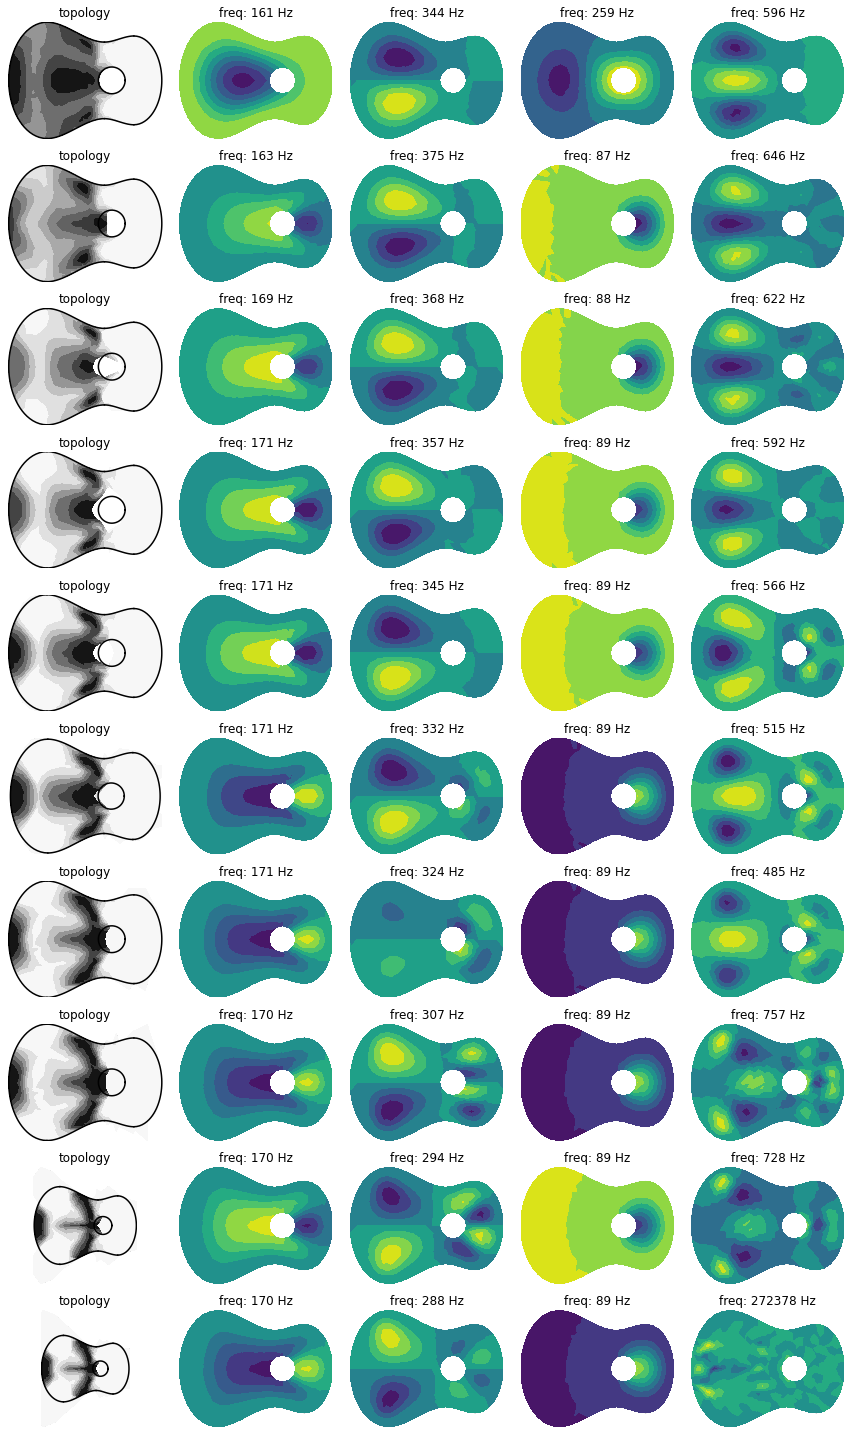

In [520]:
mesh = FEMOL.mesh.load_vtk('Results/_topopt_cache/TOM_guit_test.vtk')
eigvals = np.load('Results/_topopt_cache/eigs_guit_test.npy')
eigvecs = np.load('Results/_topopt_cache/vecs_guit_test.npy')

keys = [f'X{i}' for i in range(1, 10)]
keys.append('X')
modes = ['T11', 'T21', 'T12', 'T31']

fig, axs = plt.subplots(10, 5, figsize=(12, 20))

for i in range(10):
    mesh.cell_to_point_data(keys[i])
    ax = axs[i][0]
    plt.sca(ax)
    mesh.plot.point_data(keys[i], cmap='Greys')
    FEMOL.utils.guitar_outline2(L=1)
    ax.set_title('topology')
    for j in range(4):
        ax = axs[i][j+1]
        plt.sca(ax)
        mesh.plot.mode(eigvecs[i][j])
        ax.set_title(f'freq: {int(np.round(eigvals[i][j]))} Hz')

plt.tight_layout()